# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

The process of identifying entity types in text is known in the Natural Language Processing (NLP) community as Named-Entity Recognition (NER).


In [2]:
!pip install pycrf
!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

import pandas as pd
import numpy as np
import os

model = spacy.load("en_core_web_sm")


In [3]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

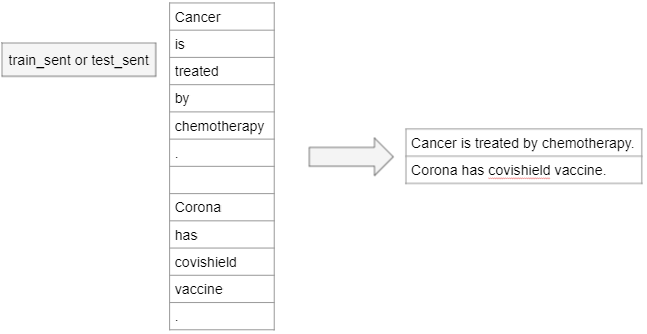

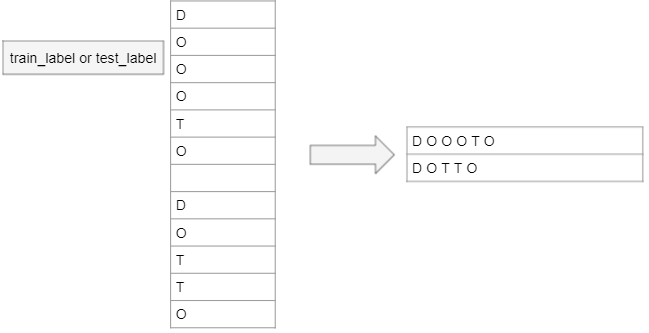

In [4]:
# Function to convert  
def listToString(s): 
    # initialize an empty string
    str1 = "" 
    # traverse in the string  
    for ele in s:
        str1 += ele  
    
    return str1 
        

In [5]:
   train_sentence= [] 
def ConstructSentences(filename,list_of_sentence):
    with open(filename, 'r') as train_sent_file:
        train_words = train_sent_file.readlines()
       
    list_of_sentence.clear()
    train_sentence.clear()
    
    for word in train_words:
      if(word!='\n'):
         word = word.replace('\n',' ')
         train_sentence.append(word)
      else:
        str2 =listToString(train_sentence)
        #print(str2)
        list_of_sentence.append(str2)
        train_sentence.clear()   
    

### Count the number of sentences in the processed train and test dataset 

In [6]:
list_of_train_sent =[]
ConstructSentences("train_sent",list_of_train_sent)
print("Sentences in Processed Train :",len(list_of_train_sent))

list_of_test_sent =[]
ConstructSentences("test_sent",list_of_test_sent)
print("Sentences in Test dataset",len(list_of_test_sent))


Sentences in Processed Train : 2599
Sentences in Test dataset 1056


### Count the number of lines of labels in the processed train and test dataset.

In [7]:
list_of_train_label =[]
ConstructSentences("train_label",list_of_train_label)
print("Number of lines of labels in the processed train:",len(list_of_train_label))

list_of_test_label =[]
ConstructSentences("test_label",list_of_test_label)
print("Number of lines of labels in the Test dataset:",len(list_of_test_label))

Number of lines of labels in the processed train: 2599
Number of lines of labels in the Test dataset: 1056


# print five sentences in train dataset along with their labels.


In [8]:
for i in range(0,5):
    print(list_of_train_sent[i])
    print(list_of_train_label[i])
    #print(i )

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status ) 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 ) 
O O O O O O O O O O O O O O O O O O O O O O O O O 
Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 ) 
O O O O O O O O O O O O O O O 
The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 ) 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively ) 
O O O O O O O O O O O O O O O

In [9]:
# print five sentences in test dataset along with their labels.
for i in range(0,5):
    print(list_of_test_sent[i])
    print(list_of_test_label[i])

Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 ) 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration 
O O O O O O O O O O O O O O O O O O O 
The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period 
O O O O O O O O O O O O O O O O O O O O O O O O 
There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 ) 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
Fluctuations in ambient temperature are inversely correlated to changes in AFI 
O O O O O O O O O O O 


##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [10]:
pos = []
lemma = []
text = []
for sentence in list_of_train_sent:
    review1=model(sentence)
    for tok in review1:
         if tok.pos_=="NOUN" or tok.pos_=="PROPN":
            pos.append(tok.pos_)
            lemma.append(tok.lemma_.lower())
            text.append(tok.text)
        #print(tok.text,"---",tok.lemma_,"---",tok.pos_)




## Print the top 25 most common tokens with NOUN or PROPN PoS tags for Train dataset

In [11]:
nlp_table_train = pd.DataFrame({'text':text,'lemma':lemma,'pos':pos})
nlp_table_train.value_counts().head(25)

text          lemma         pos  
patients      patient       NOUN     354
treatment     treatment     NOUN     195
%             %             NOUN     161
cancer        cancer        NOUN     135
therapy       therapy       NOUN     119
disease       disease       NOUN     105
study         study         NOUN     102
cell          cell          NOUN      99
lung          lung          NOUN      87
chemotherapy  chemotherapy  NOUN      65
group         group         NOUN      62
effects       effect        NOUN      61
TO_SEE        to_see        PROPN     55
gene          gene          NOUN      55
results       result        NOUN      54
use           use           NOUN      53
surgery       surgery       NOUN      51
survival      survival      NOUN      50
risk          risk          NOUN      49
women         woman         NOUN      48
activity      activity      NOUN      47
care          care          NOUN      47
children      child         NOUN      47
analysis      analysis 

In [12]:
pos = []
lemma = []
text = []
for sentence in list_of_test_sent:
    review1=model(sentence)
    for tok in review1:
         if tok.pos_=="NOUN" or tok.pos_=="PROPN":
            pos.append(tok.pos_)
            lemma.append(tok.lemma_.lower())
            text.append(tok.text)


### Print the top 25 most common tokens with NOUN or PROPN PoS tags for Test dataset


In [13]:
nlp_table_test = pd.DataFrame({'text':text,'lemma':lemma,'pos':pos})
nlp_table_test.value_counts().head(25)

text          lemma         pos  
patients      patient       NOUN     138
treatment     treatment     NOUN      86
%             %             NOUN      85
cancer        cancer        NOUN      65
therapy       therapy       NOUN      55
study         study         NOUN      51
cell          cell          NOUN      41
disease       disease       NOUN      36
gene          gene          NOUN      33
group         group         NOUN      30
women         woman         NOUN      29
lung          lung          NOUN      29
results       result        NOUN      25
cases         case          NOUN      25
effects       effect        NOUN      24
response      response      NOUN      23
analysis      analysis      NOUN      23
chemotherapy  chemotherapy  NOUN      23
risk          risk          NOUN      22
age           age           NOUN      22
rate          rate          NOUN      21
use           use           NOUN      21
TO_SEE        to_see        PROPN     20
effect        effect   

#We now know that people mention patients, treatment, cancer, Therapy etc. But we still don't know in what context they mention these keywords
#need to consider the preceding word of the current word


In [14]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [15]:
import re
def get_context(reviews,keyword):
    pattern = re.compile(f"\w+\s{keyword}\s\w+")
    prefixes_suffixes = re.findall(pattern,reviews)
    prefixes = []
    suffixes = []
    for p in prefixes_suffixes:
        l = p.split(" ")
        prefixes.append(l[0].lower())
        suffixes.append(l[-1].lower())
    prefixes = [p for p in prefixes if p not in stop_words]
    suffixes = [s for s in suffixes if s not in stop_words]
    prefixes=pd.Series(prefixes).value_counts().head(5).index
    suffixes=pd.Series(suffixes).value_counts().head(5).index
    return pd.DataFrame({'prefixes':prefixes,'keyword':[f'{keyword}']*len(prefixes),'suffixes':suffixes})

In [16]:
get_context(listToString(list_of_train_sent),"cancer")

prefixes keyword   suffixes
0        lung  cancer       risk
1      breast  cancer   patients
2    prostate  cancer  screening
3  colorectal  cancer          1
4       colon  cancer  receiving

In [17]:
get_context(listToString(list_of_test_sent),"cancer")

prefixes keyword        suffixes
0        lung  cancer    chemotherapy
1    prostate  cancer     conclusions
2      breast  cancer            cell
3  colorectal  cancer  susceptibility
4     ovarian  cancer            risk

## Defining features for CRF





In [18]:
# Let's define the features to get the feature value for one word
#A CRF is a sequence modeling algorithm which is used to identify entities or patterns in text,
#such as POS tags. 


In [19]:
def word2features(sent, i):
    word = sent[i][0]

    features = {
        'bias': 1.0,
        'word': word,
        'len(word)': len(word),
        'word[:4]': word[:4],
        'word[:3]': word[:3],
        'word[:2]': word[:2],
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word[-4:]': word[-4:],
        'word.lower()': word.lower(),
        'word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word.lower()),
        'word.ispunctuation': (word in string.punctuation),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        word1 = sent[i-1][0]
        features.update({
            '-1:word': word1,
            '-1:len(word)': len(word1),
            '-1:word.lower()': word1.lower(),
            '-1:word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word1.lower()),
            '-1:word[:3]': word1[:3],
            '-1:word[:2]': word1[:2],
            '-1:word[-3:]': word1[-3:],
            '-1:word[-2:]': word1[-2:],
            '-1:word.isdigit()': word1.isdigit(),
            '-1:word.ispunctuation': (word1 in string.punctuation),
        })
    else:
        features['BOS'] = True

    if i > 1:
        word2 = sent[i-2][0]
        features.update({
            '-2:word': word2,
            '-2:len(word)': len(word2),
            '-2:word.lower()': word2.lower(),
            '-2:word[:3]': word2[:3],
            '-2:word[:2]': word2[:2],
            '-2:word[-3:]': word2[-3:],
            '-2:word[-2:]': word2[-2:],
            '-2:word.isdigit()': word2.isdigit(),
            '-2:word.ispunctuation': (word2 in string.punctuation),
        })

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word': word1,
            '+1:len(word)': len(word1),
            '+1:word.lower()': word1.lower(),
            '+1:word[:3]': word1[:3],
            '+1:word[:2]': word1[:2],
            '+1:word[-3:]': word1[-3:],
            '+1:word[-2:]': word1[-2:],
            '+1:word.isdigit()': word1.isdigit(),
            '+1:word.ispunctuation': (word1 in string.punctuation),
        })

    else:
        features['EOS'] = True
    if i < len(sent) - 2:
        word2 = sent[i+2][0]
        features.update({
            '+2:word': word2,
            '+2:len(word)': len(word2),
            '+2:word.lower()': word2.lower(),
            '+2:word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word2.lower()),
            '+2:word[:3]': word2[:3],
            '+2:word[:2]': word2[:2],
            '+2:word[-3:]': word2[-3:],
            '+2:word[-2:]': word2[-2:],
            '+2:word.isdigit()': word2.isdigit(),
            '+2:word.ispunctuation': (word2 in string.punctuation),
        })

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [word[1] for word in sent]

def sent2tokens(sent):
    return [word[0] for word in sent]

In [20]:
#Define a function to get the above defined features for a word.
def getFeaturesForOneWord(sentence, pos):
  word = sentence[pos]

  features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 

  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence

  return features

## Getting the features

### Write a code/function to get the features for a sentence

In [21]:
# Write a code to get features for a sentence.
# Define a function to get features for a sentence 
# using the 'getFeaturesForOneWord' function.
def getFeaturesForOneSentence(sentence):
  sentence_list = sentence.split()
  return [getFeaturesForOneWord(sentence_list, pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [22]:
# Write a code to get the labels for a sentence.
# Define a function to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()

In [23]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = list_of_test_sent[5]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

This study tested the hypothesis that to reduce the rate of macrosomic infants in gestational diabetes cases , good glycemic control should be initiated before 34 completed gestational weeks 


['word.lower=tested',
 'word[-3:]=ted',
 'word[-2:]=ed',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'prev_word.lower=study',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False']

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [24]:
import math, string, re
import sklearn_crfsuite

from sklearn_crfsuite import metrics

X_train = [getFeaturesForOneSentence(sentence) for sentence in list_of_train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in list_of_test_sent]


### Define the labels as the target variable for test and the train dataset

In [25]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in list_of_train_label]


Y_test = [getLabelsInListForOneSentence(labels) for labels in list_of_test_label]

## Build the CRF Model

In [43]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)
crf.fit(X_train, Y_train)

                                 
'''crf = sklearn_crfsuite.CRF(
    algorithm = 'lbfgs',
    c1 = 0.25,
    c2 = 0.3,
    max_iterations = 100,
    all_possible_transitions=True
)
crf.fit(X_train, Y_train)'''

"crf = sklearn_crfsuite.CRF(\n    algorithm = 'lbfgs',\n    c1 = 0.25,\n    c2 = 0.3,\n    max_iterations = 100,\n    all_possible_transitions=True\n)\ncrf.fit(X_train, Y_train)"

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [44]:
#obtaining metrics such as accuracy, etc. on the train set
labels = list(crf.classes_)
#labels.remove('X')

ypred = crf.predict(X_train)
print('F1 score on the train set = {}\n'.format(metrics.flat_f1_score(Y_train, ypred, average='weighted', labels=labels)))
print('Accuracy on the train set = {}\n'.format(metrics.flat_accuracy_score(Y_train, ypred)))

sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)
print('Train set classification report: \n\n{}'.format(metrics.flat_classification_report(
Y_train, ypred, labels=sorted_labels, digits=3
)))
#obtaining metrics such as accuracy, etc. on the test set
ypred = crf.predict(X_test)
print('F1 score on the test set = {}\n'.format(metrics.flat_f1_score(Y_test, ypred,
average='weighted', labels=labels)))
print('Accuracy on the test set = {}\n'.format(metrics.flat_accuracy_score(Y_test, ypred)))

sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)
print('Test set classification report: \n\n{}'.format(metrics.flat_classification_report(Y_test, ypred, labels=sorted_labels, digits=3)))

F1 score on the train set = 0.9230077121702984

Accuracy on the train set = 0.9286523463029933

Train set classification report: 

              precision    recall  f1-score   support

           D      0.840     0.646     0.730      3439
           O      0.940     0.982     0.960     39683
           T      0.805     0.514     0.627      2780

    accuracy                          0.929     45902
   macro avg      0.861     0.714     0.773     45902
weighted avg      0.924     0.929     0.923     45902

F1 score on the test set = 0.9011555430544981

Accuracy on the test set = 0.910570415726716

Test set classification report: 

              precision    recall  f1-score   support

           D      0.785     0.532     0.635      1450
           O      0.925     0.978     0.951     16127
           T      0.703     0.395     0.506      1041

    accuracy                          0.911     18618
   macro avg      0.804     0.635     0.697     18618
weighted avg      0.902     0.911  

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [45]:
# Calculate the f1 score using the test data
Y_pred = crf.predict(X_test)
metrics.flat_f1_score(Y_test, Y_pred, average='weighted')

0.9011555430544981

In [46]:
#We can see that the model has an accuracy of around 95% on the train set
#and 91% on the test set. Playing around with the L1 and L2 regularization parameters might 
#help give us a better performance on the test set and prevent overfitting.

##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

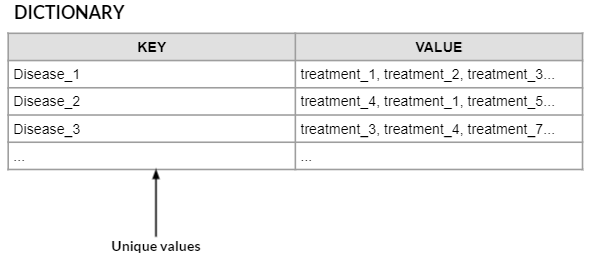

In [47]:
id = 46
print("Sentence:",list_of_test_sent[id])
print("Orig Labels:", Y_test[id])
print("Pred Labels:", Y_pred[id])


Sentence: < TO_SEE > CONTEXT : There is a substantial risk of a second cancer for persons with hereditary retinoblastoma , which is enhanced by radiotherapy 
Orig Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'O', 'O', 'O', 'O', 'O', 'T']


In [56]:
def update_list(list_disease,list_treatment,label_,word_):
   updated = 0
   if(label_ =='D' and len(word_)>1):
      list_disease.append(word_.lower())
      updated =1
   elif(label_ =='T'and len(word_)>1):
       list_treatment.append(word_.lower())
       updated =1
   return updated

In [64]:
dict = {}
print(list_of_test_sent[46])
for pos in range(0,len(list_of_test_sent)):
    sentence = list_of_test_sent[pos]
    sentence_list = sentence.split()
    #print(sentence)
    tmpword = ''
    p_lbl =''
    list_treatment =[]  
    list_disease =[]
    for y in range(0,len(Y_pred[pos])):
        c_lbl = Y_pred[pos][y]
        if Y_pred[pos][y]=='T' or Y_pred[pos][y]=='D':
            tmpword = tmpword + " "+sentence_list[y]
            
        if(c_lbl != p_lbl):
            transit = update_list(list_disease,list_treatment,p_lbl,tmpword)
            if(transit):
              tmpword =""
        #print(list_treatment)
        p_lbl =c_lbl
    
    transit = update_list(list_disease,list_treatment,p_lbl,tmpword)
    if(transit):
        tmpword =""
    #store it in dictonary
    #print(list_treatment)
    for disease in list_disease:
        #treatments =",".join(list_treatment)
        treatments =listToString(list_treatment)
        #print(pos,list_treatment)
        print (pos,disease,treatments)
        if(disease in dict):
            tmp = dict[disease]
            #print(pos ,tmp)
            tmp = tmp+"," +treatments
            tmp = tmp.strip()
            #if(len(tmp)>1):
            dict[disease] = tmp
            #print('#'+tmp)
        else:
           my_str = treatments.strip()
           #if(len(my_str)>1):
           dict[disease] = my_str
    #    dict =dict.update(disease)
#print(len(dict))
#print(dict)

< TO_SEE > CONTEXT : There is a substantial risk of a second cancer for persons with hereditary retinoblastoma , which is enhanced by radiotherapy 
5  gestational diabetes cases 
13  preeclampsia 
15  severe preeclampsia 
20  asymmetric double hemiplegia 
21  reversible nonimmune hydrops fetalis 
27  breast and/or ovarian cancer 
29  breast cancer 
29  breast cancer 
29  ovarian cancer 
33  prostate cancer 
33  mutated prostate cancer 
36  hereditary prostate cancer 
37  prostate cancer 
46  hereditary retinoblastoma  radiotherapy
61  epilepsy 
71  unstable angina or non-q-wave myocardial infarction  roxithromycin
73  coronary-artery disease  antichlamydial antibiotics
75  early-stage cervical carcinoma 
89  advanced disease 
94  cerebral palsy 
103  severe pain 
105  myofascial trigger point pain 
111  infections 
115  primary pulmonary hypertension ( pph ) 
139  osteoporosis among older persons 
143  curtis 
152  foot infections 
155  cellulitis  g-csf therapy intravenous antibiotic 

In [61]:
##Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [62]:
dict[' hereditary retinoblastoma']

'radiotherapy'